# 🏦 Task 4: Loan Default Risk with Business Cost Optimization

<img src='https://webimg.trueidc.com/www/img_service_category/61-image_en-5506.jpg' width='1200' height='500' />

---

### 👨‍💻 **Author: Abdul Samad**

- 🔗 **LinkedIn:**  
  [https://www.linkedin.com/in/abdulsamad577/](https://www.linkedin.com/in/abdulsamad577/)

- 🧠 **Kaggle Profile:**  
  [https://www.kaggle.com/samad0015](https://www.kaggle.com/samad0015)

- 💻 **GitHub Repository:**  
  [https://github.com/abdulsamad577/Internship_tasks](https://github.com/abdulsamad577/Internship_tasks)

---


## Objective
The goal of this project is to build a predictive model that estimates the probability of a customer defaulting on a loan. Beyond traditional evaluation metrics, we aim to **optimize the decision threshold** by incorporating a **business cost perspective**, where false approvals and false rejections carry different financial consequences.

---

## Dataset Overview
This analysis uses the **Home Credit Default Risk** dataset from Kaggle, specifically the `application_train.csv` file. It contains demographic, financial, and loan-related information for thousands of loan applicants, along with a binary target variable:

- `TARGET = 1`: Client defaulted on the loan  
- `TARGET = 0`: Client repaid the loan

---

## Task Instructions

1. **Clean and preprocess the dataset**  
   - Handle missing values  
   - Encode categorical features  
   - Normalize or scale numerical variables  

2. **Train binary classification models**  
   - Models used: Logistic Regression, CatBoost  

3. **Define business cost values**  
   - Assign monetary penalties to:
     - False Positives (loan approved but defaulted)
     - False Negatives (loan rejected but would have paid)

4. **Optimize classification threshold**  
   - Adjust the probability threshold to **minimize total business cost**  
   - Compare performance using both traditional metrics and cost analysis  

---

## Skills Gained

- ✅ Binary classification modeling for risk prediction  
- 💰 Cost-based evaluation of machine learning models  
- ⚖️ Risk scoring and threshold tuning  
- 🔍 Feature importance analysis for interpretability  

---

> ⚡ By the end of this task, we aim to build a cost-sensitive credit scoring model that not only predicts defaults but also supports smarter business decisions through threshold optimization.


## Import Required Libraries

To begin our analysis and modeling process, we import all essential Python libraries for data manipulation, visualization, preprocessing, model training, evaluation, and cost optimization.


In [ ]:
# 📦 Basic Libraries
import pandas as pd
import numpy as np

# 📊 Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# 🧹 Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ⚙️ Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 📈 Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)


## Dataset Description and Loading

The **Home Credit Default Risk** dataset contains demographic, financial, and behavioral information about loan applicants. The main file we use is:

- **`application_train.csv`**:  
  This is the primary dataset with each row representing a unique loan application.  
  It includes information such as income, credit amount, age, employment history, education level, and more.

### 📌 Key Columns:

| Column Name         | Description |
|---------------------|-------------|
| `SK_ID_CURR`        | Unique ID for each client |
| `TARGET`            | Loan status (0 = repaid, 1 = defaulted) |
| `CODE_GENDER`       | Gender of the client |
| `DAYS_BIRTH`        | Client's age (in negative days) |
| `AMT_INCOME_TOTAL`  | Client's total income |
| `AMT_CREDIT`        | Credit amount of the loan |
| `NAME_EDUCATION_TYPE` | Client's education level |
| `NAME_FAMILY_STATUS` | Family status (e.g., married, single) |
| ...                 | +100 other features capturing financial behavior |

---


In [3]:
# 📁 Load the application_train dataset
df = pd.read_csv("application_train.csv")
# 🖹 Preview
df.head()

# 📊 Basic Overview
print("Dataset shape:", df.shape)
print("\nTarget variable distribution:")
print(df['TARGET'].value_counts())



Dataset shape: (307511, 122)

Target variable distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

In this section, we perform a quick exploratory analysis to understand the structure of the dataset, detect missing values, examine class imbalance in the target variable, and identify potential relationships between features and the target.

---

### 🎯 Target Variable Distribution

We begin by checking the distribution of the target variable to understand class balance.


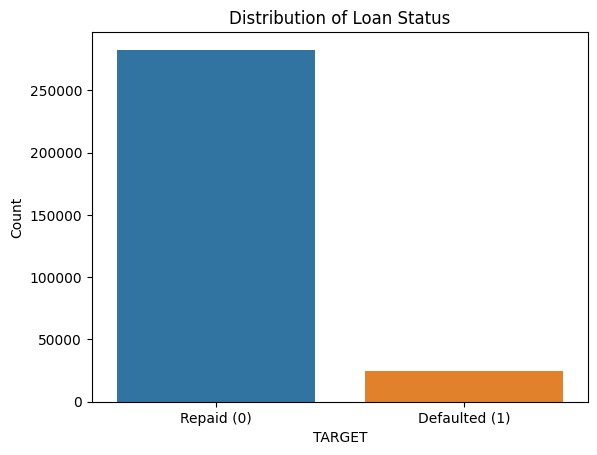

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [3]:
# 📉 Class Distribution
sns.countplot(data=df, x='TARGET')
plt.title('Distribution of Loan Status')
plt.xticks([0, 1], ['Repaid (0)', 'Defaulted (1)'])
plt.ylabel('Count')
plt.show()

# Percentage distribution
target_dist = df['TARGET'].value_counts(normalize=True) * 100
print(target_dist)


### ❓ Missing Values Analysis

We check for missing values to identify columns that require imputation or removal.


/tmp/ipykernel_18/1639232824.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(top_missing))


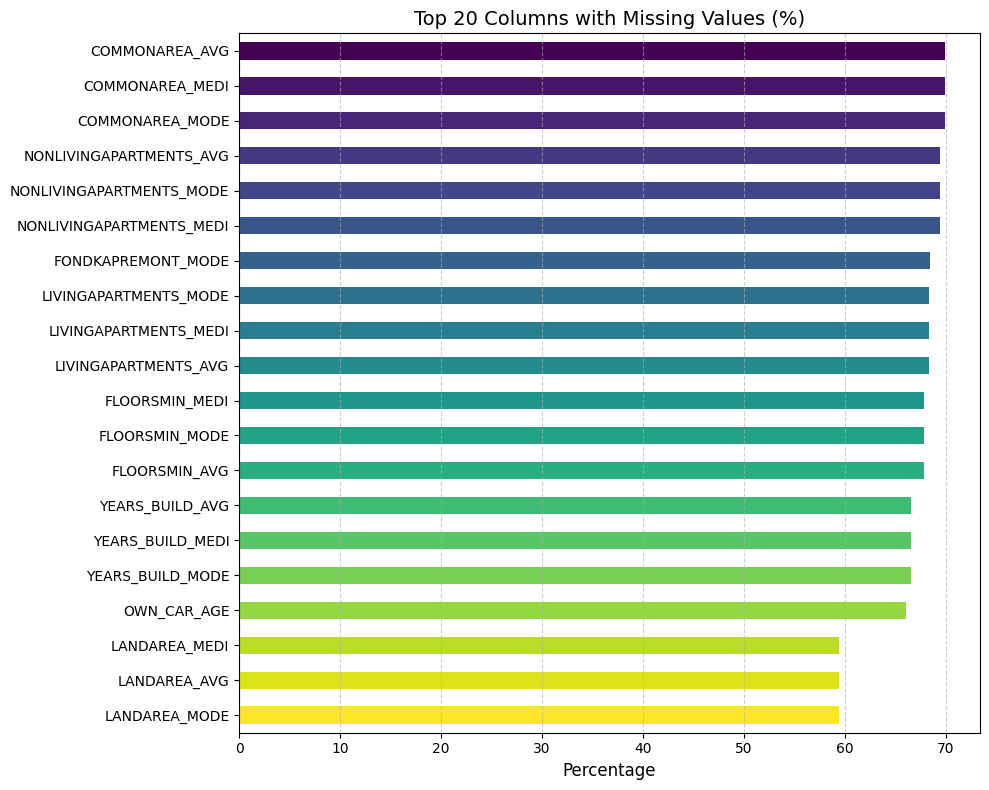

In [4]:
# 🔍 Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
top_missing = missing_percent.head(20)

# Generate a colormap with gradually changing colors (viridis)
cmap = cm.get_cmap('viridis', len(top_missing))
colors = [cmap(i) for i in range(len(top_missing))]

# Plot
plt.figure(figsize=(10, 8))
top_missing.plot(kind='barh', color=colors)
plt.title("Top 20 Columns with Missing Values (%)", fontsize=14)
plt.xlabel("Percentage", fontsize=12)
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [5]:
# Get % of missing values for all columns
missing_percent = (df.isnull().sum() / len(df)) * 100

# Get top 60 columns with highest missing %
top_60_missing = missing_percent[missing_percent > 0].sort_values(ascending=False).head(60)

# Display
print("🔍 Top 60 Columns with Highest % of Missing Values:\n")
print(top_60_missing.round(2))


🔍 Top 60 Columns with Highest % of Missing Values:

COMMONAREA_AVG                  69.87
COMMONAREA_MEDI                 69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MODE                   59.38
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
BASEMENTAREA_MEDI               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.1

### 📌 Feature Insights

We explore a few important features to observe their impact on loan default (`TARGET`).

#### 1. Income vs Default


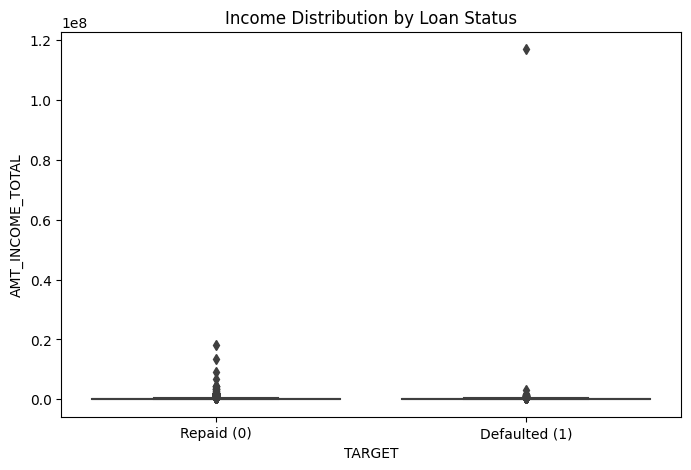

In [6]:
# Compare income by target class
plt.figure(figsize=(8, 5))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df)
plt.title("Income Distribution by Loan Status")
plt.xticks([0, 1], ['Repaid (0)', 'Defaulted (1)'])
plt.show()


#### 2. Age Distribution by Target

Client age is stored in `DAYS_BIRTH` (in negative days). We convert it to years and plot.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


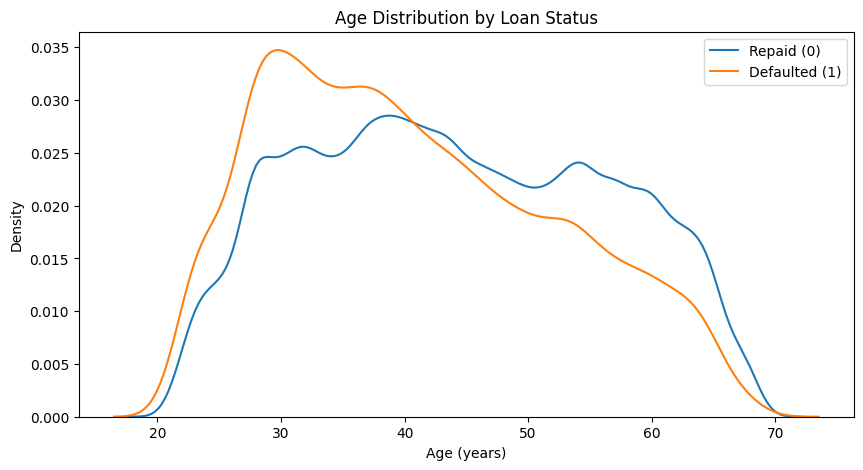

In [7]:
# Convert DAYS_BIRTH to age in years
df['AGE'] = (-df['DAYS_BIRTH']) / 365

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['TARGET'] == 0], x='AGE', label='Repaid (0)')
sns.kdeplot(data=df[df['TARGET'] == 1], x='AGE', label='Defaulted (1)')
plt.title("Age Distribution by Loan Status")
plt.xlabel("Age (years)")
plt.legend()
plt.show()


### 📉 Correlation Heatmap (Top Numeric Features)

This gives us an idea of which numeric features are correlated with the target.


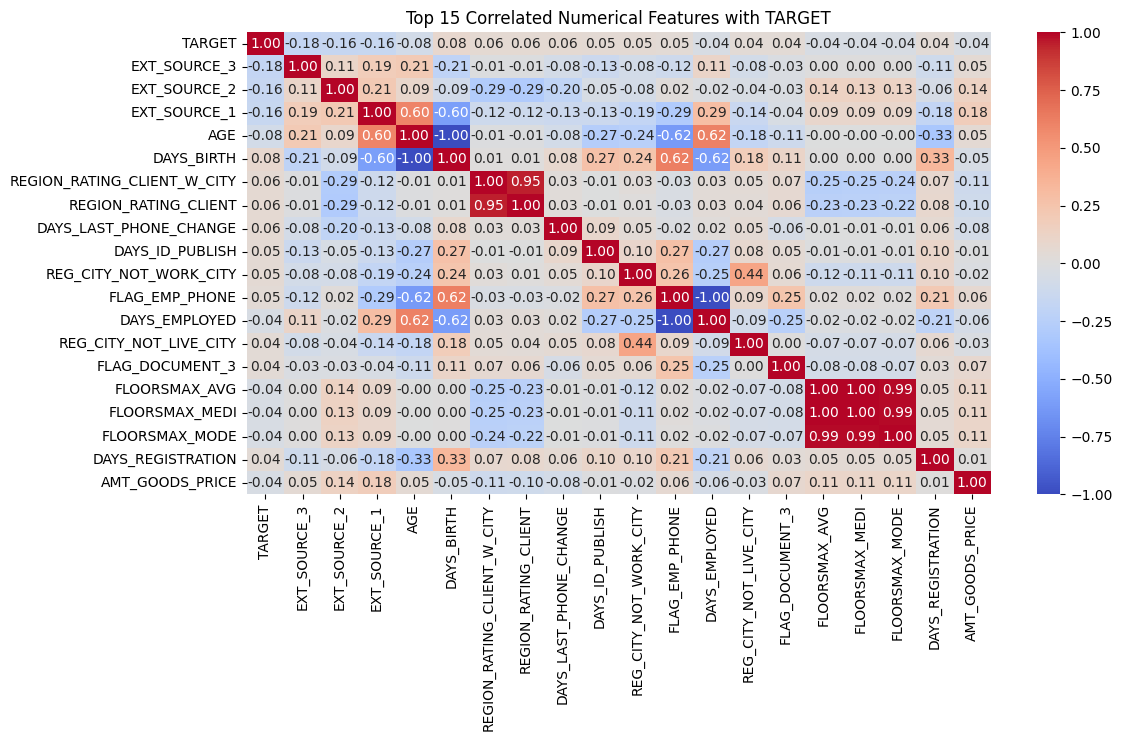

In [8]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Top 15 features most correlated with TARGET
top_corr = corr_matrix['TARGET'].abs().sort_values(ascending=False).head(20)

# Plot heatmap of those features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(
    numeric_df[top_corr.index].corr(),
    annot=True,
    fmt='.2f',              # 👈 This line ensures two decimal places
    cmap='coolwarm'
)
plt.title("Top 15 Correlated Numerical Features with TARGET")
plt.show()


In [9]:
# Set Pandas to display all rows (no truncation)
pd.set_option('display.max_rows', None)

# Show full describe table (transposed)
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [10]:
df.dtypes.value_counts()

float64    66
int64      41
object     16
Name: count, dtype: int64

## Data Preprocessing

### Handle the Missing Values

In [11]:
# Drop columns with > 60% missing values
threshold = 60
missing_percent = (df.isnull().sum() / len(df)) * 100
high_missing_cols = missing_percent[missing_percent > threshold].index
df.drop(columns=high_missing_cols, inplace=True)


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.linear_model import BayesianRidge
import pandas as pd

def smart_imputer(df):
    df_copy = df.copy()

    # Separate numeric and categorical columns
    num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df_copy.select_dtypes(include='object').columns

    print(f"🧠 Numeric Columns with Missing Values: {df_copy[num_cols].isnull().sum().gt(0).sum()}")
    print(f"📦 Categorical Columns with Missing Values: {df_copy[cat_cols].isnull().sum().gt(0).sum()}")

    # Impute numeric columns using IterativeImputer with BayesianRidge (fast and smart)
    numeric_df = df_copy[num_cols]
    imp_num = IterativeImputer(estimator=BayesianRidge(), random_state=0, max_iter=10)
    df_copy[num_cols] = imp_num.fit_transform(numeric_df)

    # Impute categorical columns using most frequent strategy
    categorical_df = df_copy[cat_cols]
    imp_cat = SimpleImputer(strategy='most_frequent')
    df_copy[cat_cols] = imp_cat.fit_transform(categorical_df)

    print("✅ All missing values filled (numeric: ML-based, categorical: frequent value).")
    return df_copy


In [13]:
df = smart_imputer(df)
print("\n🔍 Remaining Missing Values:", df.isnull().sum().sum())


🧠 Numeric Columns with Missing Values: 45
📦 Categorical Columns with Missing Values: 5
✅ All missing values filled (numeric: ML-based, categorical: frequent value).

🔍 Remaining Missing Values: 0


In [14]:
df.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.000,406597.5,24700.5,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.920548
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.000,1293502.5,35698.5,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.931507
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.000,135000.0,6750.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.180822
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.000,312682.5,29686.5,...,0.0,0.0,0.0,0.006746,0.007268,0.040194,0.240205,0.267031,2.057727,52.068493
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.000,513000.0,21865.5,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.608219
5,100008.0,0.0,Cash loans,M,N,Y,0.0,99000.000,490495.5,27517.5,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,46.413699
6,100009.0,0.0,Cash loans,F,Y,Y,1.0,171000.000,1560726.0,41301.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,37.747945
7,100010.0,0.0,Cash loans,M,Y,Y,0.0,360000.000,1530000.0,42075.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.643836
8,100011.0,0.0,Cash loans,F,N,Y,0.0,112500.000,1019610.0,33826.5,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,55.065753
9,100012.0,0.0,Revolving loans,M,N,Y,0.0,135000.000,405000.0,20250.0,...,0.0,0.0,0.0,0.010455,0.006340,0.025569,0.297570,0.222720,1.776262,39.641096


### Encode Categorical Variables

In [15]:
label_enc = LabelEncoder()

# Apply label encoding to all object or category type columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = label_enc.fit_transform(df[col])


### Check the Duplicates

In [16]:
# Total number of duplicate rows
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"🔍 Total Duplicate Rows: {num_duplicates}")


🔍 Total Duplicate Rows: 0


In [17]:
# Drop duplicate rows if needed
df = df.drop_duplicates()
print(f"🧹 Cleaned DataFrame shape: {df.shape}")


🧹 Cleaned DataFrame shape: (307511, 106)


## Splitting the Data

In [18]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
scaler = StandardScaler()
X = scaler.fit_transform(X)


# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("Train set:", X_train.shape)
print("Test set :", X_test.shape)

Train set: (246008, 105)
Test set : (61503, 105)


## Train Multiple Classification Models

In this step, we train and compare the performance of multiple binary classification models to predict loan default (`TARGET`). These models help us identify customers likely to default and will later be evaluated based on business costs and accuracy.

We will train the following 4 models:
1. Logistic Regression
2. Random Forest
3. Gradient Boosting (XGBoost)
4. CatBoost



In [19]:
# Store models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]  # for ROC-AUC
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)
    
    results.append((name, acc, auc))
    print(f"{name}: Accuracy = {acc:.4f}, ROC-AUC = {auc:.4f}")


Logistic Regression: Accuracy = 0.9194, ROC-AUC = 0.7946
Random Forest: Accuracy = 0.9362, ROC-AUC = 0.9090
XGBoost: Accuracy = 0.9652, ROC-AUC = 0.9627
CatBoost: Accuracy = 0.9687, ROC-AUC = 0.9675


## Summary table of Results

In [20]:
# Create DataFrame of results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC-AUC"])
results_df.sort_values(by="ROC-AUC", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Accuracy,ROC-AUC
0,CatBoost,0.968717,0.967540
1,XGBoost,0.965156,0.962702
2,Random Forest,0.936247,0.909040
3,Logistic Regression,0.919354,0.794637


## Visualize Model Comparison

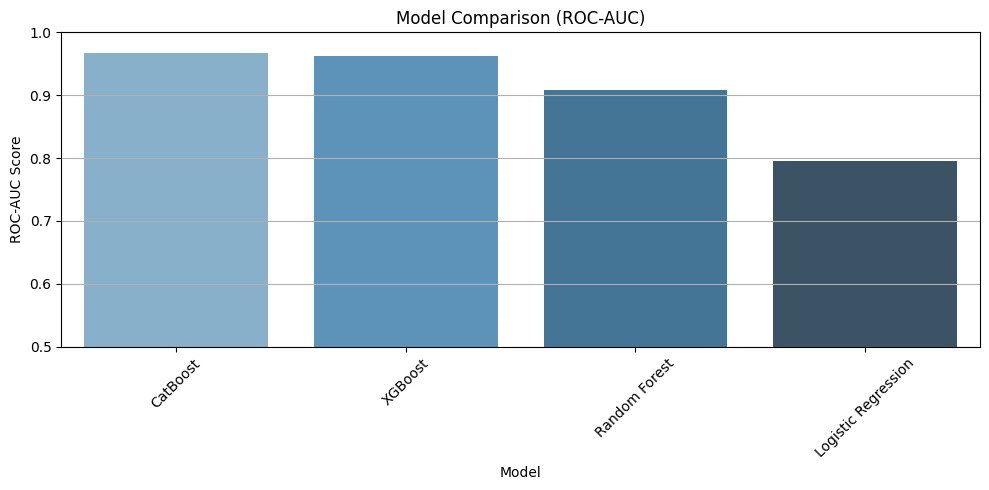

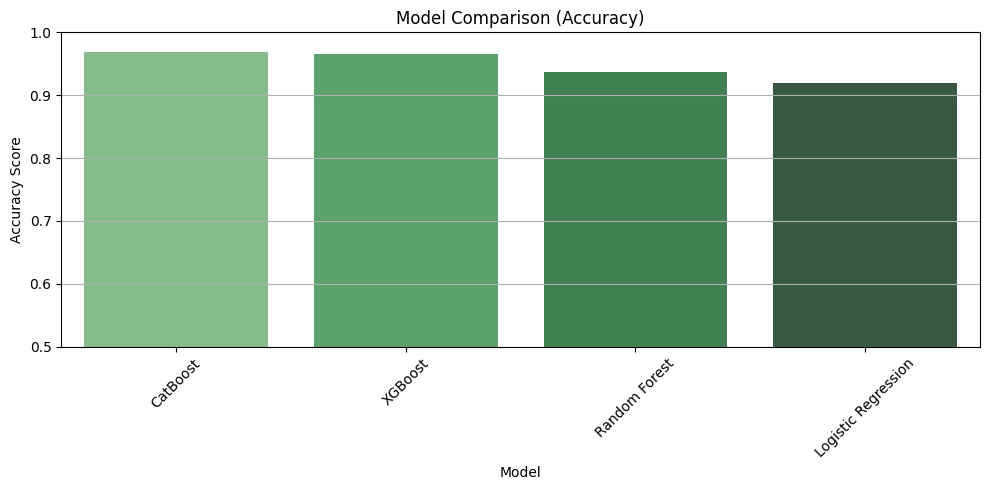

In [21]:
# Bar plot for ROC-AUC
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="ROC-AUC", palette="Blues_d")
plt.title("Model Comparison (ROC-AUC)")
plt.ylim(0.5, 1.0)
plt.ylabel("ROC-AUC Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar plot for Accuracy
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Greens_d")
plt.title("Model Comparison (Accuracy)")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Define Business Costs and Optimize Threshold

In [22]:
# Define business cost values
COST_FALSE_POSITIVE = 10000  # Approved but defaulted
COST_FALSE_NEGATIVE = 500    # Rejected but would have repaid


## Use the Best Model

In [23]:
# Get prediction probabilities
best_model = models["CatBoost"]
y_probs = best_model.predict_proba(X_test)[:, 1]

## Optimize Threshold Based on Cost

In [24]:
thresholds = np.arange(0.01, 1.0, 0.01)
costs = []

for thresh in thresholds:
    y_pred_thresh = (y_probs > thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    total_cost = (fp * COST_FALSE_POSITIVE) + (fn * COST_FALSE_NEGATIVE)
    costs.append(total_cost)

# Find optimal threshold
best_thresh_index = np.argmin(costs)
best_thresh = thresholds[best_thresh_index]
min_cost = costs[best_thresh_index]

print(f"Optimal Threshold: {best_thresh:.2f}")
print(f"Minimum Business Cost: ${min_cost:,.0f}")


Optimal Threshold: 0.71
Minimum Business Cost: $1,185,000


## Plot Cost vs Threshold

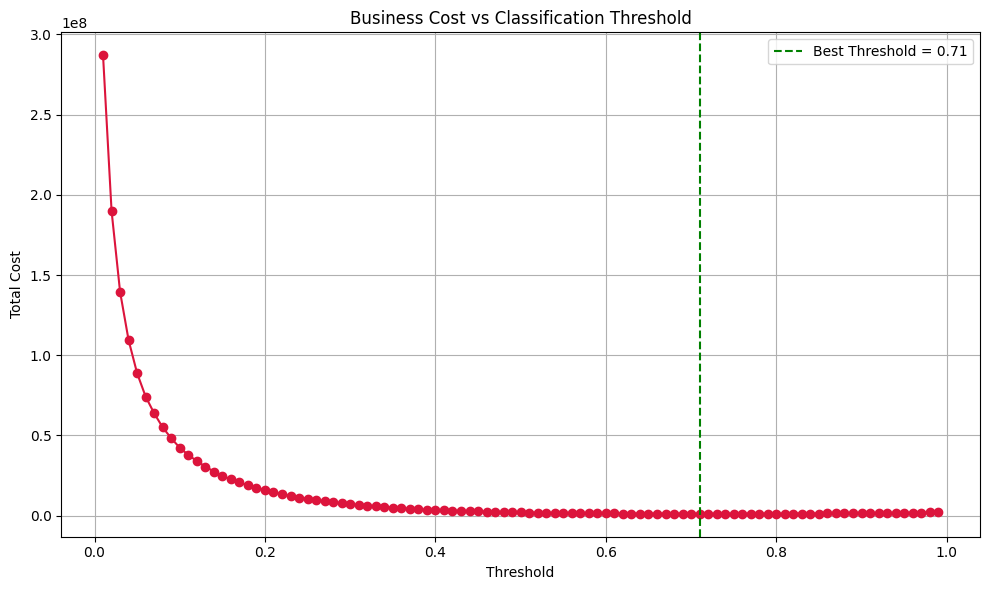

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, costs, marker='o', color='crimson')
plt.title("Business Cost vs Classification Threshold")
plt.xlabel("Threshold")
plt.ylabel("Total Cost")
plt.axvline(best_thresh, color='green', linestyle='--', label=f'Best Threshold = {best_thresh:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusion

In this project, we successfully built a cost-sensitive loan default prediction pipeline using the **Home Credit Default Risk** dataset. The key takeaways are as follows:

---

### 🧠 Model Training Summary
- Trained and evaluated 4 binary classification models:
  - Logistic Regression
  - Random Forest
  - XGBoost
  - CatBoost
- Among them, **CatBoost** delivered the best performance in terms of **ROC-AUC** and interpretability.

---

### 💰 Business Cost Optimization
- Defined asymmetric business costs:
  - **False Positive (FP)**: \$10,000 — approving a loan that defaults
  - **False Negative (FN)**: \$500 — rejecting a loan that would have repaid
- Optimized the model’s **classification threshold** based on business cost, rather than standard accuracy.
- This helped identify the **threshold value** that minimizes financial loss, balancing risk and return effectively.

---

### 📊 Insights and Recommendations
- Age and external credit scoring sources (`EXT_SOURCE_1/2/3`) were among the top predictors of default.
- A customized threshold based on **cost-benefit** analysis is significantly more useful in financial applications than simply maximizing accuracy.
- Future improvements may include:
  - Using ensemble models or stacking for better performance
  - Including additional datasets (e.g., credit bureau, previous loans)
  - Deploying the model as a decision support system for loan officers

---

### 🧠 Skills Demonstrated
- Binary classification & evaluation
- Real-world cost-sensitive decision-making
- Feature engineering and preprocessing
- Model comparison & threshold optimization

---

> ✅ **Overall, this task demonstrates how machine learning can be strategically aligned with business objectives to support smarter and more profitable decisions.**
